# **California Housing Prices**

[Sumber data California Housing Prices](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Exploratory Data Analysis
5. Modeling
6. Conclusion
7. Recommendation

****

# Business Problem Understanding

**Context** 

Perumahan merupakan kebutuhan pokok semua manusia, semua orang di dunia ingin mempunyai rumah yang nyaman untuk ditinggali. Pertumbuhan penduduk yang semakin meningkat membuat permintaan untuk perumahan semakin meningkat pula. Seperti halnya di salah satu negara bagian di Amerika Serikat, California. Banyaknya penduduk di sini membuka kesempatan yang besar bagi para developer perumahan untuk menyediakan rumah yang dapat menghasilkan keuntungan untuk mereka, tetapi para developer tentunya tidak ingin membuat suatu rumah dengan harga dan value yang kurang tepat yang dapat menyebabkan kurang maksimalnya profit. Banyak faktor yang dapat menentukan harga rumah yang cocok untuk dijual oleh developer, seperti lokasi, detail, dan fitur-fitur yang terdapat pada rumah tersebut. Oleh karena itu, jika ingin menjadi developer perumahan tentu harus tau berapa harga yang dapat ditawarkan dengan fitur-fitur yang ada di rumah tersebut dan dimana lokasi rumah tersebut berada.

**Problem Statement**

Problem terbesar bagi developer perumahan adalah menentukan harga yang cocok untuk suatu rumah agar rumah tersebut dapat dijual dengan profit yang maksimal. Perumahan yang sudah ada serta persaingan dengan developer lain membuat developer perumahan harus dapat membuat suatu rumah dengan spesifikasi serta lokasi yang tepat dan menjualnya dengan harga yang tepat untuk dapat bersaing.

**Goals**

Berdasarkan permasalah tersebut, developer perlu memiliki 'tool' yang dapat memprediksi dan membantu mereka dalam menentukan harga jual suatu rumah yang tepat. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu rumah, seperti jumlah kamar, jumlah kamar tidur, dan lokasi dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit yang maksimal bagi developer dan harga yang sesuai untuk pembeli.

**Analytic Approach**

Jadi, yang perlu saya lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu perumahan dengan yang lainnya. 

Selanjutnya, saya akan membangun suatu model regresi yang akan membantu developer untuk dapat menyediakan 'tool' prediksi harga jual suatu rumah yang akan mereka bangun, yang mana akan berguna untuk developer dalam membangun rumah dengan modal yang sesuai.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual sesuai dengan limitasi fitur yang digunakan. 

# Data Understanding

- Dataset diambil dari data sensus perumahan di negara bagian California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait perumahan di tiap blok dan populasinya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | float64 | titik koordinat garis bujur |
| latitude | float64  | titik koordinat garis lintang |
| housing_median_age | float64 | nilai tengah umur rumah per blok |
| total_rooms | float64 | jumlah kamar/ruangan per blok |
| total_bedrooms | float64 | jumlah kamar tidur per blok |
| population | float64 | jumlah populasi per blok |
| households | float64 | jumlah rumah tangga per blok |
| median_income | float64 | nilai tengah pendapatan per blok (dihitung dalam 10.000 US Dollars) |
| ocean_proximity | object | jarak perumahan dari laut |
| median_house_value | float64 | nilai tengah harga/value perumahan per blok (dihitung dalam US Dollar) |

<br>

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Dari info data diatas terdapat 1 fitur kategorikal dan selebihnya merupakan numerikal

In [4]:
# Deskripsi dataset
display(df.describe(),
        df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


# Exploratory Data Analysis

**Distribusi Data**

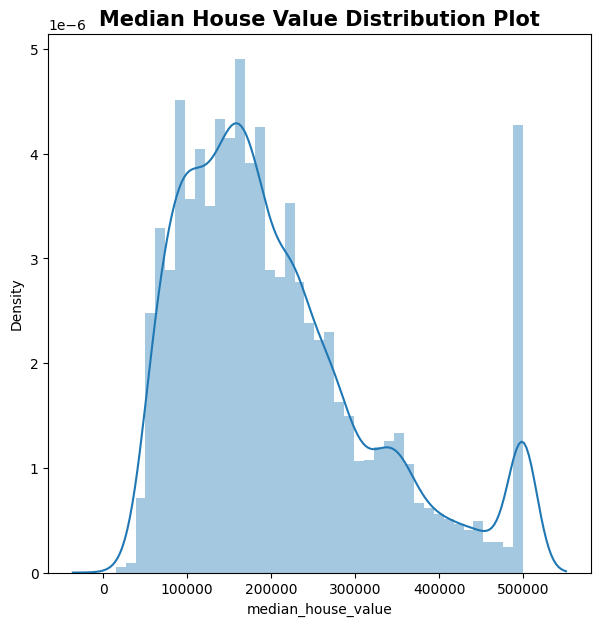

In [5]:
# Plot distribusi fitur 'median_house_value'
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Median House Value Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga median perumahan di atas, terlihat bahwa di plot cenderung terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur median house value.

**Jumlah Perumahan Berdasarkan Lokasi**

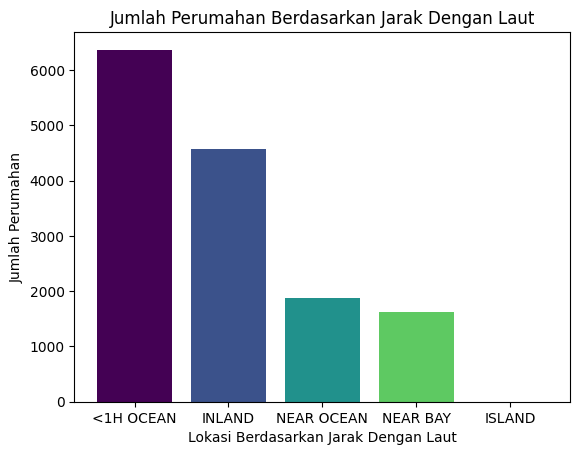

In [6]:
# Plot jumlah perumaan berdasarkan lokasi
import matplotlib.cm as cm

lokasi = df['ocean_proximity'].value_counts().to_dict()

categories = list(lokasi.keys())
values = list(lokasi.values())

colormap = cm.get_cmap('viridis')
colors = [colormap(i) for i in np.linspace(0, 1, len(categories))]
plt.bar(categories, values, color=colors)
plt.xlabel('Lokasi Berdasarkan Jarak Dengan Laut')
plt.ylabel('Jumlah Perumahan')
plt.title('Jumlah Perumahan Berdasarkan Jarak Dengan Laut')
plt.show() 

Dari grafik di atas dapat dilihat bahwa kebanyakan perumahan berada di lokasi `<1H OCEAN` dan `INLAND`, sedangkan perumahan yang berada di lokasi `ISLAND` jumlahnya sangat sedikit. Dikarenakan luas tanah yang dapat dibangun rumah di sekitar laut maupun di dalam pulau terbatas, sedangkan daerah yang jauh dari laut mempunyai banyak lahan yang dapat dibangun rumah di atasnya.

**Data Geografis**

Text(0.5, 1.0, 'Persebaran Perumahan Berdasarkan Jarak Dengan Laut')

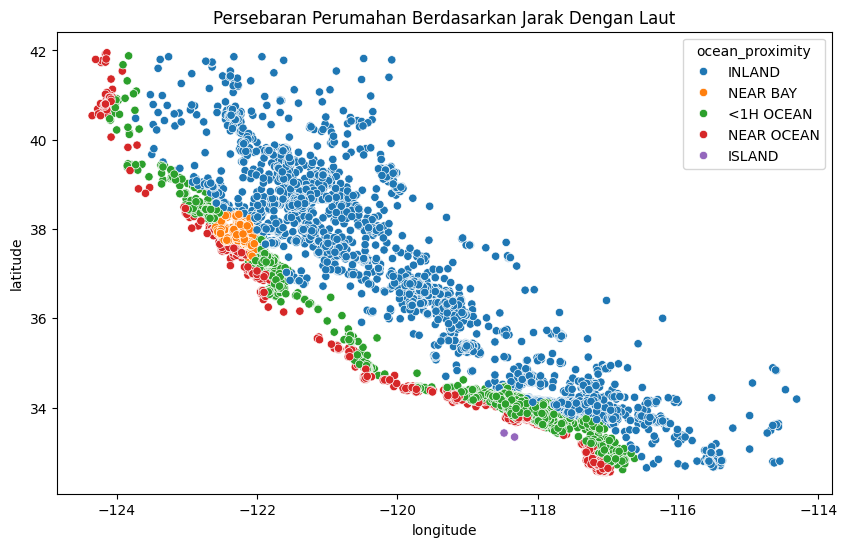

In [7]:
# Plot persebaran lokasi perumahan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity']).set_title('Persebaran Perumahan Berdasarkan Jarak Dengan Laut')

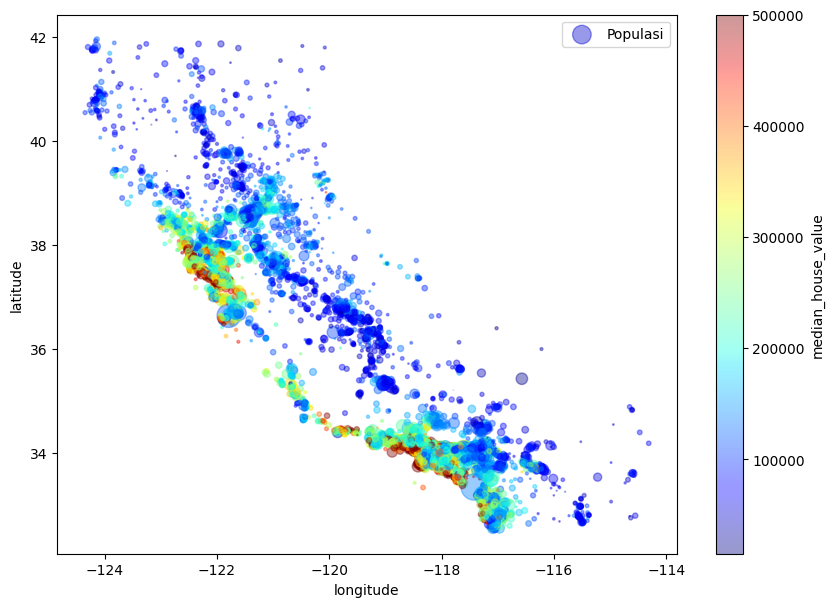

In [8]:
# Plot persebaran lokasi perumahan dengan harga & jumlah populasi
df.plot(
    kind='scatter',
    x = 'longitude',
    y = 'latitude',
    alpha = 0.4,
    s = df['population']/100,
    label = 'Populasi',
    figsize = (10, 7),
    c = 'median_house_value',
    cmap = plt.get_cmap('jet'),
    colorbar = True
)
plt.legend()

Warna merepresentasikan harga : semakin merah semakin mahal, sebaliknya semakin biru semakin murah. Sedangkan besar kecilnya lingkaran merepresentasikan jumlah populasi : semakin besar lingkaran semakin banyak populasi, sebaliknya semakin kecil semakin sedikit populasi.

Dapat dilihat dari plot di atas persebaran populasi cukup merata di hampir semua lokasi, terdapat beberapa lokasi yang mempunyai populasi yang terlihat mempunyai populasi yang jauh lebih banyak. Untuk persebaran harga dapat dilihat harga perumahan semakin dekat dengan laut lebih mahal, sedangkan harga perumahan yang lebih jauh dari laut mempunyai harga yang relatif lebih murah.

# Data Preprocessing

Pada tahap ini, saya akan melakukan pengecekan dan cleaning pada data yang nantinya data yang sudah dibersihkan akan saya gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

- Mengecek missing value, dan data duplikasi.
- Melakukan treatment terhadap missing value dan data duplikasi jika ada.
- Mengecek outlier dan merapihkan data yang mempunyai outlier.

Untuk proses data preprocessing dan feature engineering, saya akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [9]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [10]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([
        col, 
        df_model[col].dtype, 
        df_model[col].isna().sum(), 
        round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
        df_model[col].nunique(), 
        list(df_model[col].drop_duplicates().sample(2).values)
        ]);

df_model_desc = pd.DataFrame(columns=[
    'dataFeatures', 
    'dataType', 
    'null', 
    'nullPct', 
    'unique', 
    'uniqueSample'
    ],data=listItem
    )
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-121.96, -121.51]"
1,latitude,float64,0,0.00,836,"[36.19, 36.14]"
2,housing_median_age,float64,0,0.00,52,"[28.0, 45.0]"
3,total_rooms,float64,0,0.00,5227,"[1579.0, 3025.0]"
4,total_bedrooms,float64,137,0.95,1748,"[744.0, 728.0]"
5,population,float64,0,0.00,3498,"[728.0, 519.0]"
6,households,float64,0,0.00,1649,"[1437.0, 502.0]"
7,median_income,float64,0,0.00,9797,"[1.7176, 2.7885]"
8,ocean_proximity,object,0,0.00,5,"[INLAND, <1H OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[256400.0, 78100.0]"


Dari info dataset diatas, terdapat data kosong pada fitur total_bedroom. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

In [11]:
n = df_model.isna().sum()
null = pd.concat([n,n/ len(df_model) * 100], axis = 1, keys = ['num', '%'])
null

,num,%
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,137,0.948228
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
ocean_proximity,0,0.000000
median_house_value,0,0.000000


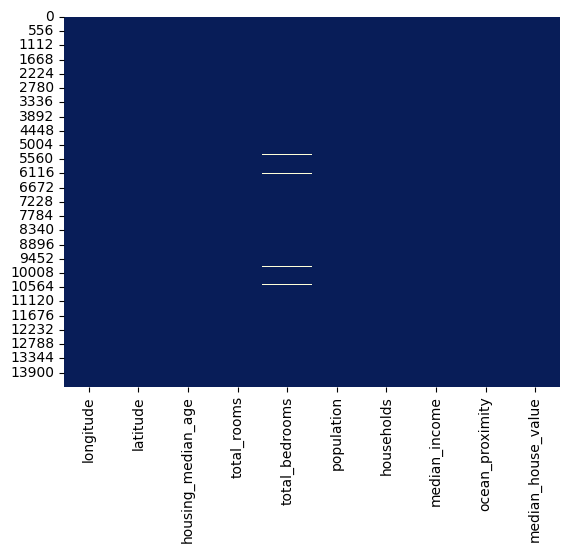

In [12]:
# Missing Value Heatmap
sns.heatmap(df_model.isnull(), cmap ='YlGnBu_r', cbar = False);

In [13]:
# Membuang baris dengan data null
df_model.dropna(inplace=True)

In [14]:
# Cek missing value
df_model.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [15]:
df_model['ocean_proximity'].isnull().value_counts()

ocean_proximity
False    14311
Name: count, dtype: int64

In [16]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(0)

Dari hasil diatas tidak terdapat data duplikat pada dataset dan jumlah missing value yang ada pada fitur total_bedroom hanya berjumlah 137 atau sekitar 0.94% oleh karena itu saya melakukan penghapusan terhadap missing value tersebut.

**Data Correlation**

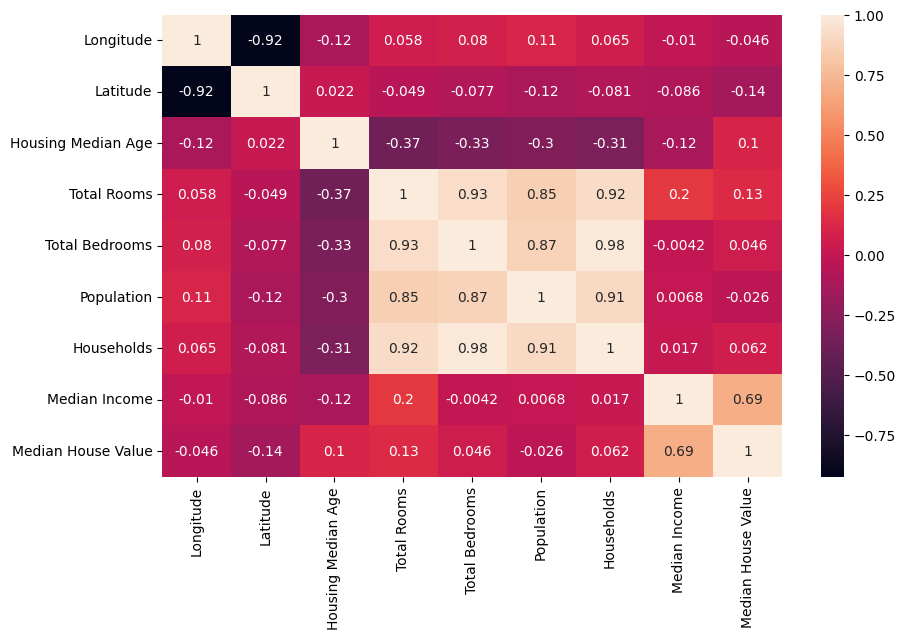

In [17]:
# Correlation matrix
numeric_cols = df_model.select_dtypes(include=['number', 'bool']).columns

h_labels = [x.replace('_', ' ').title() for x in numeric_cols]

corr_matrix = df_model[numeric_cols].corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 6))
heat = sns.heatmap(corr_matrix, annot=True, xticklabels=h_labels, yticklabels=h_labels, ax=ax)


Berdasarkan korelasi tersebut, median_income memiliki korelasi positif yang cukup kuat dengan median_house_value dengan nilai korelasi 0.69 yang menunjukkan bahwa semakin tinggi pendapatan median di suatu area, semakin tinggi juga nilai median rumah di area tersebut.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan.

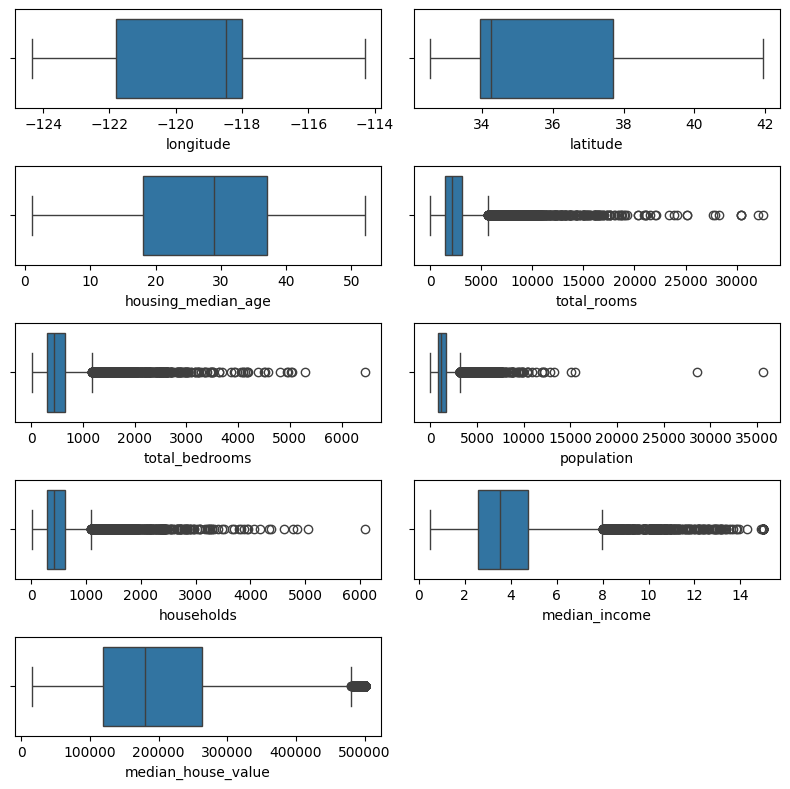

In [18]:
# Plot boxplot untuk mengecek outliers
numerik = df_model.select_dtypes(include = 'number')
plt.figure(figsize = (8,8))

posisi = 1 
for setiap_kolom in numerik.columns: 
    plt.subplot(5,2,posisi)
    sns.boxplot(x = df_model[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Dengan tidak memperhatikan fitur latitude & longitude, terdapat sejumlah outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan menghitung IQR dari tiap kolom lalu menentukan batas atas dan batas bawahnya, setelah itu saya akan menghapus outlier yang berada di luar batas untuk mendapatkan 'clean dataset'. Hal ini dilakukan agar hasil prediksi dari model tidak akan menjadi bias.

In [19]:
# Menghitung IQR tiap kolom
Q1 = df_model[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].quantile(0.25)
Q3 = df_model[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah & batas atas untuk outlier
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menghapus outlier
df_model = df_model[~((df_model[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']] < batas_bawah) | (df_model[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']] > batas_atas)).any(axis=1)]


Hanya 6 fitur yang merupakan numerikal yang saya bersihkan dari outlier, 2 fitur yang merupakan `longitude` & `latitude` tidak saya ikut sertakan dikarenakan 2 fitur ini akan saya drop nanti.

Dalam implementasi ini, metode quantile() digunakan untuk menghitung kuartil pertama dan ketiga (Q1 dan Q3) dari setiap fitur. IQR kemudian dihitung sebagai selisih antara Q3 dan Q1. Batas bawah dan atas untuk outlier didefinisikan sebagai Q1 - 1,5 * IQR dan Q3 + 1,5 * IQR. Setiap data yang berada di luar batas-batas ini dihapus dari DataFrame menggunakan metode any().

**Featured Selection**

In [20]:
# Membuat fitur baru
df_model['rooms_per_household'] = df_model['total_rooms'] / df_model['households']
df_model['bedrooms_per_room'] = df_model['total_bedrooms'] / df_model['total_rooms']
df_model['population_per_household'] = df_model['population'] / df_model['households']

# Drop fitur yang tidak relevan
df_model = df_model.drop(['total_rooms', 'total_bedrooms', 'population', 'households', 'longitude', 'latitude'], axis=1)

Setelah membuat 3 fitur baru, saya drop 4 fitur lama yang sudah tidak lagi relevan, fitur tersebut adalah : `longitude`, `latitude`, `total_rooms`, `total_bedrooms`, `population`, dan `households`

**Clean Dataset**

In [21]:
# Cek dataset yang sudah bersih
df_model

,housing_median_age,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,52.0,1.9750,INLAND,47500.0,2.800000,0.250000,4.825000
1,43.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,17.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
4,50.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
7,17.0,5.2586,INLAND,137000.0,6.945035,0.162880,3.207447
...,...,...,...,...,...,...,...
14442,19.0,2.2375,INLAND,64300.0,4.742105,0.203108,3.684211
14443,20.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,27.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14446,34.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [22]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12616 entries, 0 to 14447
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        12616 non-null  float64
 1   median_income             12616 non-null  float64
 2   ocean_proximity           12616 non-null  object 
 3   median_house_value        12616 non-null  float64
 4   rooms_per_household       12616 non-null  float64
 5   bedrooms_per_room         12616 non-null  float64
 6   population_per_household  12616 non-null  float64
dtypes: float64(6), object(1)
memory usage: 788.5+ KB


# Modelling

In [23]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from jcopml.tuning import grid_search_params as gsp

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Terdapat 1 fitur kategorikal dalam dataset saya yaitu `ocean_proximity`, untuk dapat menggunakannya saya akan mengubahnya menjadi fitur numerikal. Fitur `ocean_proximity` tidak memiliki tingkatan yang jelas, oleh karena itu saya akan menggunakan OneHotEncoder. Saya akan menggunakan column transformer untuk mengubah tipe datanya, yang nanti akan diaplikasikan pada pipeline model. 

In [24]:
# Menentukan kolom transformer
categorical_features = ['ocean_proximity']

transformer = ColumnTransformer(
    transformers=[
        ('OHE', OneHotEncoder(), categorical_features),
    ],remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(), ['ocean_proximity'])])

**Data Splitting**

In [25]:
# Memisahkan data independen variabel dengan target
X = df_model.drop('median_house_value', axis=1)
y = df_model['median_house_value']

**Train and Tst Splitting**

In [26]:
# splitting data training & test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)

**Choose a Benchmark Model**

In [27]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-69612.45717635 -69758.85411649 -66790.53019401 -71323.41169889
 -67398.40264724] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-47664.89568397 -47351.01416243 -45255.91831552 -48616.47212192
 -47039.20446705] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.26137304 -0.25715296 -0.24755173 -0.26602987 -0.24884719] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-67712.43574361 -68183.25969537 -64690.16424492 -69589.02109935
 -67798.93768418] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-46587.23051747 -45885.96094225 -44527.33408709 -47545.6308836
 -47673.38558532] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [28]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-68976.731167,1660.925585,-47185.500950,1099.962202,-0.256191,0.007115
1,KNN Regressor,-67594.763693,1600.976067,-46443.908403,1160.216383,-0.255859,0.004917
2,DecisionTree Regressor,-83784.026090,1801.646562,-57714.819315,858.542214,-0.332540,0.005096
3,RandomForest Regressor,-61282.586738,1602.098705,-41821.301129,891.108012,-0.230870,0.005051
4,XGBoost Regressor,-62866.260195,1241.957142,-42924.545179,871.867873,-0.235948,0.005237


Terdapat lima algoritma yang dibandingkan berdasarkan beberapa metrik evaluasi, yaitu Mean RMSE, Std RMSE, Mean MAE, Std MAE, Mean MAPE, dan Std MAPE.

Berdasarkan skor RMSE rata-rata, model Random Forest memiliki hasil terbaik dengan skor -61272.166178, diikuti oleh model XGBRegressor dengan skor -62866.260195. Model Decision Tree memiliki skor RMSE terburuk dengan rata-rata -83742.251987.

Untuk metrik MAE, model Random Forest kembali memiliki performa terbaik dengan skor rata-rata -41814.394648, diikuti oleh model XGBRegressor dengan skor -42924.545179. Model Decision Tree memiliki skor MAE terburuk dengan rata-rata -57667.022080.

Untuk metrik MAPE, performa terbaik diperoleh oleh model Random Forest dengan skor rata-rata -0.230873.

Secara keseluruhan, model Random Forest dan XGBRegressor tampaknya menjadi model dengan kinerja terbaik berdasarkan skor rata-rata untuk ketiga metrik.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [29]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,61725.543033,43525.008856,0.260890
RandomForest,59668.541318,42482.270895,0.250442


Ketika dilakukan prediksi pada test set, performa Random Forest secara keseluruhan (dari nilai RMSE, MAE, MAPE) sedikit lebih baik dari XGB.

**Hyperparameter Tuning**

Karena model Random Forest memiliki performa yang sedikit lebih baik dari XGB, maka selanjutnya kita akan menggunakan model Random Forest ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model Random Forest dengan harapan dapat meningkatkan performa model.

In [30]:
# Mencari parameter terbaik dari class yang diimpor dari library jcopml.tuning
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [31]:
rf = RandomForestRegressor(random_state=1)

param_grid = {'model__n_estimators': [100, 150, 200],
              'model__max_depth': [20, 50, 80],
              'model__max_features': [0.3, 0.6, 0.8],
              'model__min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
    ]),
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1
)

# Fitting data training untuk mencari parameter terbaik
grid_search.fit(X_train, y_train)

# Print parameter terbaik dan hasil skor
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Parameters:  {'model__max_depth': 20, 'model__max_features': 0.6, 'model__min_samples_leaf': 5, 'model__n_estimators': 200}
Best Score:  -0.2438813253582126


Parameter terbaik `gridsearch.best_params_`

{'model__max_depth': 20, 'model__max_features': 0.6, 'model__min_samples_leaf': 5, 'model__n_estimators': 150}

Hyperparameter ini dapat digunakan untuk melatih model Random Forest pada dataset yang diberikan. Kinerja model dapat dievaluasi menggunakan metrik evaluasi yang sesuai untuk menentukan seberapa baik model dapat membuat prediksi pada data baru yang belum pernah dilihat sebelumnya.

**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model Random Forest dan hyperparameter terpilih.

In [32]:
# Model Random Forest
model = {'RandomForest': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = grid_search.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,59052.041154,41893.109224,0.247022


**Performance Comparison**

Perbandingan performa model Random Forest sebelum dan sesudah dilakukan hyperparameter tuning.

In [33]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,59668.541318,42482.270895,0.250442


In [34]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,59052.041154,41893.109224,0.247022


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 59669, 42482, 0.250442
- RMSE, MAE & MAPE setelah tuning: 59052, 41893, 0.247022

**Residual Plot**

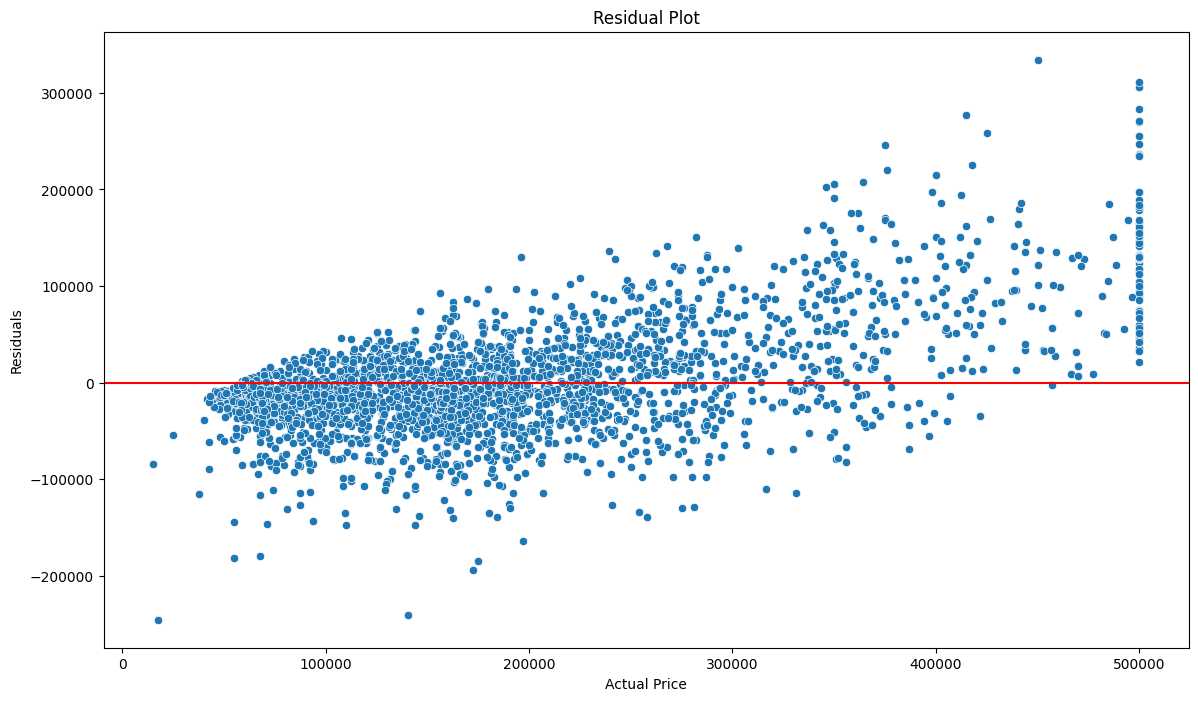

In [35]:
plt.figure(figsize=(14, 8))
y_pred_rf_tuning = rf_tuning.predict(X_test)
residuals = y_test - y_pred_rf_tuning
plot = sns.scatterplot(x=y_test, y=residuals).set(title='Residual Plot', 
                                                 xlabel='Actual Price', 
                                                 ylabel='Residuals')
plt.axhline(y=0, color='red');

Terdapat beberapa nilai-nilai error yang cukup besar tetapi tidak berjumlah sangat banyak. Kebanyakan dari nilai-nilai mempunyai error/miss yang sedikit, membuat adanya perbedaan antara nilai RMSE dan MAE. Pada plot di atas, terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, perbedaan harganya tidak sangat signifikan, banyak harga prediksi yang sudah mendekati harga aktualnya. Nilai MAPE yang didapat, yaitu sekitar 25% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

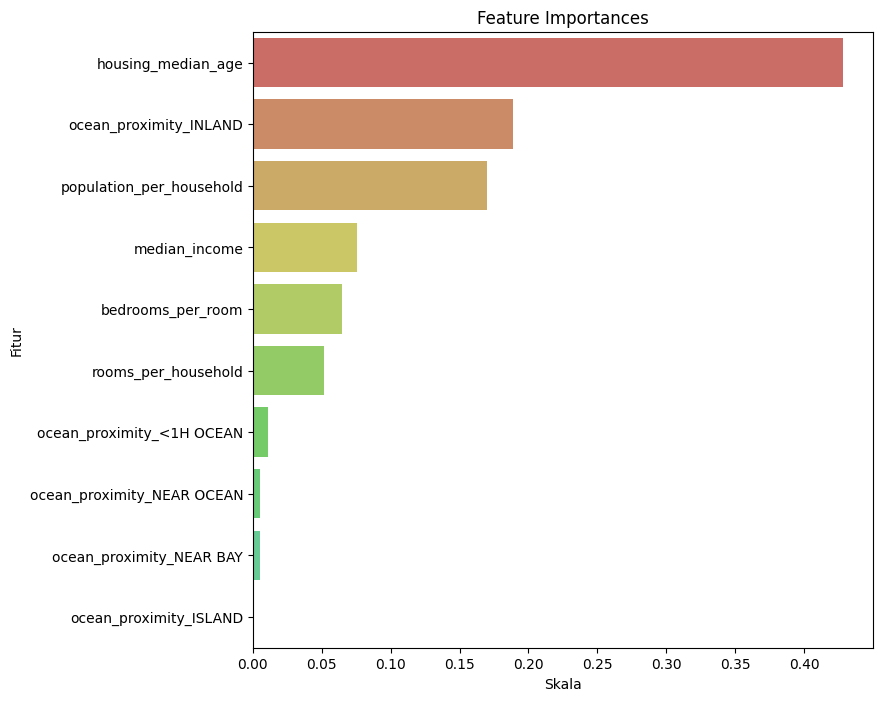

In [39]:
# Plot feature importances
transformed_feature_names = list(transformer.named_transformers_['OHE'].get_feature_names_out())
continuous_features = ['median_income', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
feature_names = transformed_feature_names + continuous_features
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
bar2 = sns.barplot(x=feature_imp, y=feature_imp.index,
                   palette=sns.hls_palette(n_colors=20), ax=ax)
bar2 = ax.set(xlabel='Skala', ylabel='Fitur', title='Feature Importances')

# Conclusion

- Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE.
- Diantara 5 model regresi, Random Forest merupakan algoritma pemodelan yang paling baik dalam memprediksi nilai median rumah di California dari dataset.
- Berdasarkan pemodelan yang sudah dilakukan, fitur `median_income` dan `ocean_proximity` menjadi fitur yang paling berpengaruh terhadap `median_house_value`.
- Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~25%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga perumahan baru di California pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 25% dari harga seharusnya.


# Recomendation

Ada beberapa rekomendasi yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti :

1. Melihat kembali data predict, data mana saja yang memiliki nilai error yang tinggi, lalu membandingkan feature-feature mana saja yang menyebabkan model menghasilkan error tersebut dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita dapat melakukan training ulang dengan penerapan feature engineering lainnya.

2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('median_house_value'), seperti luas tanah & bangunan atau jarak perumahan dengan pusat kota. Selain itu, dataset ini dibuat pada tahun 1990, pembaruan data terkini untuk California Housing Prices dapat mengimprovisasi kapasitas prediksi model ini.

3. Menambahkan data atau mengimprovisasi data dapat membuat model menjadi lebih baik.

# Save Model

**Import Pickle, Save and Load ML**

In [40]:
# Import library
import _pickle as pickle

# Save model
estimator = Pipeline([
        ('preprocessing', transformer), ('model', RandomForestRegressor())])
estimator.fit(X_train,y_train)

pickle.dump(estimator, open('data_california_house.sav', 'wb'))

In [41]:
# Load model
filename = 'data_california_house.sav'

loaded_model = pickle.load(open(filename, 'rb'))

Prediksi RMSE

In [44]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(59735.66046586898)

Prediksi MAE

In [42]:
mean_absolute_error(y_test, loaded_model.predict(X_test))

np.float64(42475.446509508714)

Prediksi MAPE

In [43]:
mean_absolute_percentage_error(y_test, loaded_model.predict(X_test))

np.float64(0.250157218308208)